In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import itertools
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import classification_report, f1_score , confusion_matrix



# Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers,models,Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')



# Loading Dataset

In [3]:

# path = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"
# path2= "/kaggle/input/vehicle-images-dataset"
# path3= "/kaggle/input/dollar-street-dataset/Dollar street trial"

# data = {"imgpath": [] , "labels": [] }

# category = os.listdir(path)
# for folder in category:
#     folderpath = os.path.join(path , folder)
#     if folder.startswith("cow") or folder.startswith("rat") or folder.startswith("cat") or folder.startswith("dog") or folder.startswith("cockroach"):
#         filelist = os.listdir(folderpath)
#         for file in filelist:
#             fpath = os.path.join(folderpath, file)
#             data["imgpath"].append(fpath)
#             data["labels"].append(folder)

# category2 = os.listdir(path2)
# for folder in category2:
#     folderpath = os.path.join(path2 , folder)
#     filelist = os.listdir(folderpath)
#     for file in filelist:
#         fpath = os.path.join(folderpath, file)
#         data["imgpath"].append(fpath)
#         data["labels"].append(folder)


# for folder in os.listdir(path3):
#     subfolder_path = os.path.join(path3, folder)

#     # Check if the subfolder is an 'Objects' category and not an 'Abstract' category
#     if (folder.startswith("Objects__refrigerators") or folder.startswith("Objects__tvs") or folder.startswith("Objects__wall-clocks") or folder.startswith("Objects__sofas") )  and not folder.startswith("Abstract__"):
#         label = folder.replace("Objects__", "")

#         # Iterate through 'ann' and 'img' subfolders
#         for subsubfolder in ['ann', 'img']:
#             img_subfolder_path = os.path.join(subfolder_path, subsubfolder)

#             # Iterate through the image files in the 'img' subfolder
#             for image_file in os.listdir(img_subfolder_path):
#                 if image_file.endswith(".jpg"):  # Adjust the file extension if necessary
#                     img_path = os.path.join(img_subfolder_path, image_file)
#                     data["imgpath"].append(img_path)
#                     data["labels"].append(label)



# df = pd.DataFrame(data)

# #Convert labels to numbers
# lb = LabelEncoder()
# df['encoded_labels'] = lb.fit_transform(df['labels'])

In [4]:
path = "/content/drive/MyDrive/Skripsi/penyakit_daun_jeruk"
# path2= "/kaggle/input/vehicle-images-dataset"
# path3= "/kaggle/input/dollar-street-dataset/Dollar street trial"

data = {"imgpath": [] , "labels": [] }

category = os.listdir(path)
for folder in category:
    folderpath = os.path.join(path , folder)
    if folder.startswith("Blackspot Leaf") or folder.startswith("Canker Leaf") or folder.startswith("Greening Leaf") or folder.startswith("Powdery Mildew") or folder.startswith("Citrus Leafminer") or folder.startswith("Healthy Leaf"):
        filelist = os.listdir(folderpath)
        for file in filelist:
            fpath = os.path.join(folderpath, file)
            data["imgpath"].append(fpath)
            data["labels"].append(folder)

# category2 = os.listdir(path2)
# for folder in category2:
#     folderpath = os.path.join(path2 , folder)
#     filelist = os.listdir(folderpath)
#     for file in filelist:
#         fpath = os.path.join(folderpath, file)
#         data["imgpath"].append(fpath)
#         data["labels"].append(folder)


# for folder in os.listdir(path3):
#     subfolder_path = os.path.join(path3, folder)

#     # Check if the subfolder is an 'Objects' category and not an 'Abstract' category
#     if (folder.startswith("Objects__refrigerators") or folder.startswith("Objects__tvs") or folder.startswith("Objects__wall-clocks") or folder.startswith("Objects__sofas") )  and not folder.startswith("Abstract__"):
#         label = folder.replace("Objects__", "")

#         # Iterate through 'ann' and 'img' subfolders
#         for subsubfolder in ['ann', 'img']:
#             img_subfolder_path = os.path.join(subfolder_path, subsubfolder)

#             # Iterate through the image files in the 'img' subfolder
#             for image_file in os.listdir(img_subfolder_path):
#                 if image_file.endswith(".jpg"):  # Adjust the file extension if necessary
#                     img_path = os.path.join(img_subfolder_path, image_file)
#                     data["imgpath"].append(img_path)
#                     data["labels"].append(label)



df = pd.DataFrame(data)

#Convert labels to numbers
lb = LabelEncoder()
df['encoded_labels'] = lb.fit_transform(df['labels'])

In [5]:
unique_labels = df['labels'].unique()
print("Unique Labels:", unique_labels)


Unique Labels: ['Healthy Leaf' 'Blackspot Leaf' 'Citrus Leafminer' 'Canker Leaf'
 'Greening Leaf' 'Powdery Mildew']


# Split the Dataset into Train and Test

In [6]:
train_df, Temp_df = train_test_split(df,  train_size= 0.70 , shuffle=True, random_state=124)
valid_df , test_df = train_test_split(Temp_df ,  train_size= 0.70 , shuffle=True, random_state=124)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print("----------Train-------------")
print(train_df[["imgpath", "labels"]].head(5))
print(train_df.shape)
print("--------Validation----------")
print(valid_df[["imgpath", "labels"]].head(5))
print(valid_df.shape)
print("----------Test--------------")
print(test_df[["imgpath", "labels"]].head(5))
print(test_df.shape)

----------Train-------------
                                             imgpath         labels
0  /content/drive/MyDrive/Skripsi/penyakit_daun_j...  Greening Leaf
1  /content/drive/MyDrive/Skripsi/penyakit_daun_j...  Greening Leaf
2  /content/drive/MyDrive/Skripsi/penyakit_daun_j...    Canker Leaf
3  /content/drive/MyDrive/Skripsi/penyakit_daun_j...   Healthy Leaf
4  /content/drive/MyDrive/Skripsi/penyakit_daun_j...    Canker Leaf
(420, 3)
--------Validation----------
                                             imgpath            labels
0  /content/drive/MyDrive/Skripsi/penyakit_daun_j...  Citrus Leafminer
1  /content/drive/MyDrive/Skripsi/penyakit_daun_j...     Greening Leaf
2  /content/drive/MyDrive/Skripsi/penyakit_daun_j...     Greening Leaf
3  /content/drive/MyDrive/Skripsi/penyakit_daun_j...      Healthy Leaf
4  /content/drive/MyDrive/Skripsi/penyakit_daun_j...      Healthy Leaf
(125, 3)
----------Test--------------
                                             imgpath         

# Sample Data View

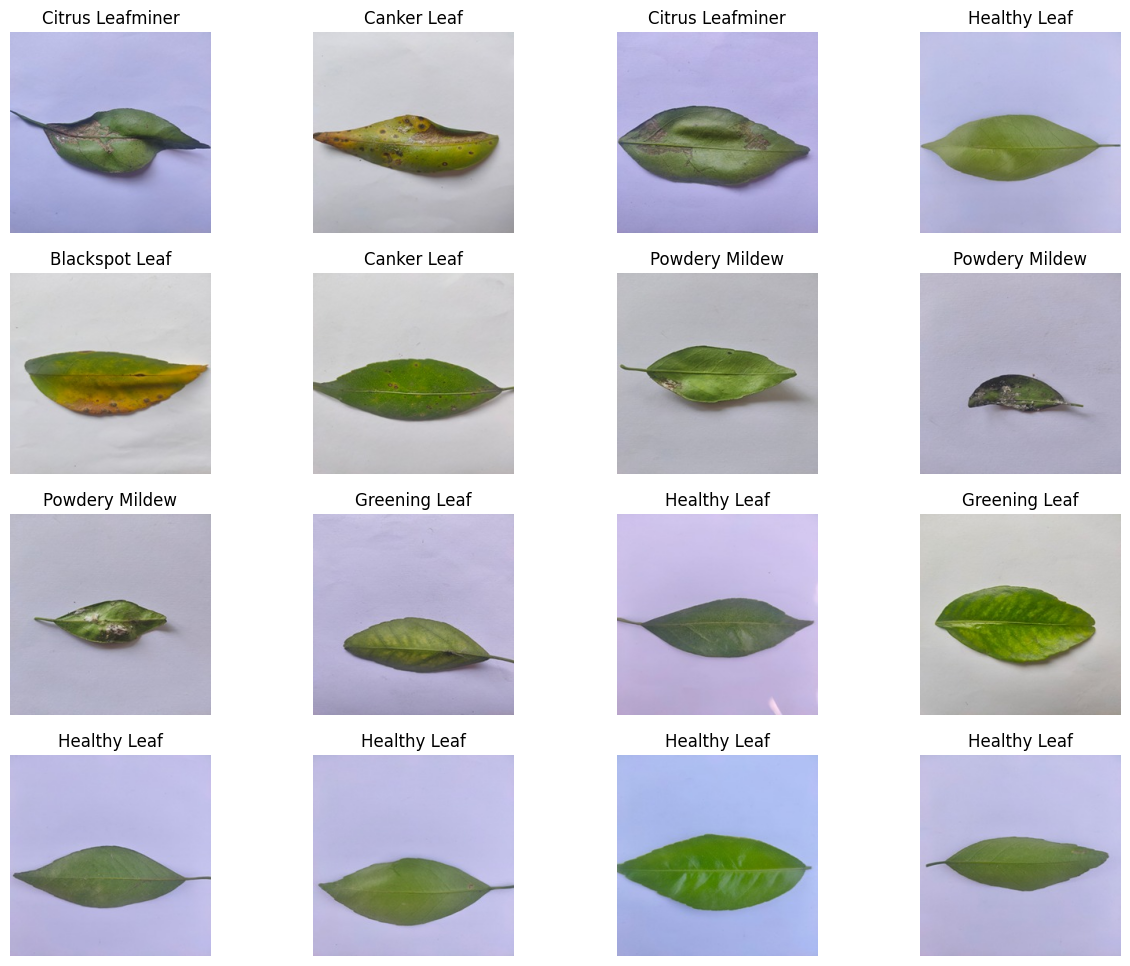

In [7]:
plt.figure(figsize=(15,12))
for i, row in test_df.sample(n=16).reset_index().iterrows():
    plt.subplot(4,4,i+1)
    image_path = row['imgpath']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["labels"])
    plt.axis('off')
plt.show()

In [8]:
df['labels'].unique()

array(['Healthy Leaf', 'Blackspot Leaf', 'Citrus Leafminer',
       'Canker Leaf', 'Greening Leaf', 'Powdery Mildew'], dtype=object)

# Creating Data Loaders

In [9]:
%%time

BATCH_SIZE = 15
IMAGE_SIZE = (224, 224)


generator = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
    # there could be image augmentation here
)

# Split the data into three categories.
train_images = generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)

val_images = generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_images = generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 420 validated image filenames belonging to 6 classes.
Found 125 validated image filenames belonging to 6 classes.
Found 55 validated image filenames belonging to 6 classes.
CPU times: user 42.9 ms, sys: 10.2 ms, total: 53.2 ms
Wall time: 313 ms


In [10]:
df['labels'].unique()

array(['Healthy Leaf', 'Blackspot Leaf', 'Citrus Leafminer',
       'Canker Leaf', 'Greening Leaf', 'Powdery Mildew'], dtype=object)

# Model Structure

In [11]:
import tensorflow as tf

# Check your TensorFlow version
print("TensorFlow version:", tf.__version__)

# Load the pretrained model
pretrained_model = tf.keras.applications.EfficientNetB2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

# Create a new input tensor with the desired data type (float32)
input_tensor = tf.keras.layers.Input(shape=(224, 224, 3))
x = input_tensor

# Preprocess your input data here (e.g., normalization, resizing, etc.)

# Apply the EfficientNetB3 model
x = pretrained_model(x)

# Freezing the layers of a pretrained neural network
for layer in pretrained_model.layers:
    layer.trainable = False

# Continue building your model as needed
# ...


TensorFlow version: 2.15.0


In [12]:
num_classes = len(set(train_images.classes))


# Data Augmentation Step
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.15),
  layers.experimental.preprocessing.RandomZoom(0.15),
  layers.experimental.preprocessing.RandomContrast(0.15),
], name='AugmentationLayer')



inputs = layers.Input(shape = (224,224,3), name='inputLayer')
x = augment(inputs)
pretrain_out = pretrained_model(x, training = False)
x = layers.Dense(256)(pretrain_out)
x = layers.Activation(activation="relu")(x)
x = BatchNormalization()(x)
x = layers.Dropout(0.45)(x)
x = layers.Dense(num_classes)(x)
outputs = layers.Activation(activation="softmax", dtype=tf.float32, name='activationLayer')(x) # mixed_precision need separated Dense and Activation layers
model = Model(inputs=inputs, outputs=outputs)



model.compile(
    optimizer=Adam(0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# model.load_weights('./checkpoints/my_checkpoint')
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 AugmentationLayer (Sequent  (None, 224, 224, 3)       0         
 ial)                                                            
                                                                 
 efficientnetb2 (Functional  (None, 1408)              7768569   
 )                                                               
                                                                 
 dense (Dense)               (None, 256)               360704    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024  

# Training : Transfer Learning

In [13]:
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=10,
    callbacks=[
        EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 3,
                               restore_best_weights = True), # if val loss decreases for 10 epochs in a row, stop training,
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min')
    ]
)
model.save_weights('./checkpoints/my_checkpoint')

Epoch 1/10
28/28 [==============================] - 26s 227ms/step - loss: 1.2437 - accuracy: 0.5381 - val_loss: 2.2894 - val_accuracy: 0.6800 - lr: 5.0000e-04
Epoch 2/10
28/28 [==============================] - 3s 121ms/step - loss: 0.5758 - accuracy: 0.7976 - val_loss: 1.4895 - val_accuracy: 0.6640 - lr: 5.0000e-04
Epoch 3/10
28/28 [==============================] - 3s 100ms/step - loss: 0.3978 - accuracy: 0.8571 - val_loss: 1.4449 - val_accuracy: 0.7040 - lr: 5.0000e-04
Epoch 4/10
28/28 [==============================] - 3s 96ms/step - loss: 0.3265 - accuracy: 0.8833 - val_loss: 1.3375 - val_accuracy: 0.6960 - lr: 5.0000e-04
Epoch 5/10
28/28 [==============================] - 3s 103ms/step - loss: 0.2823 - accuracy: 0.8976 - val_loss: 1.1025 - val_accuracy: 0.6960 - lr: 5.0000e-04
Epoch 6/10
28/28 [==============================] - 4s 149ms/step - loss: 0.2407 - accuracy: 0.9143 - val_loss: 0.4232 - val_accuracy: 0.8560 - lr: 5.0000e-04
Epoch 7/10
28/28 [============================

# Display model performance

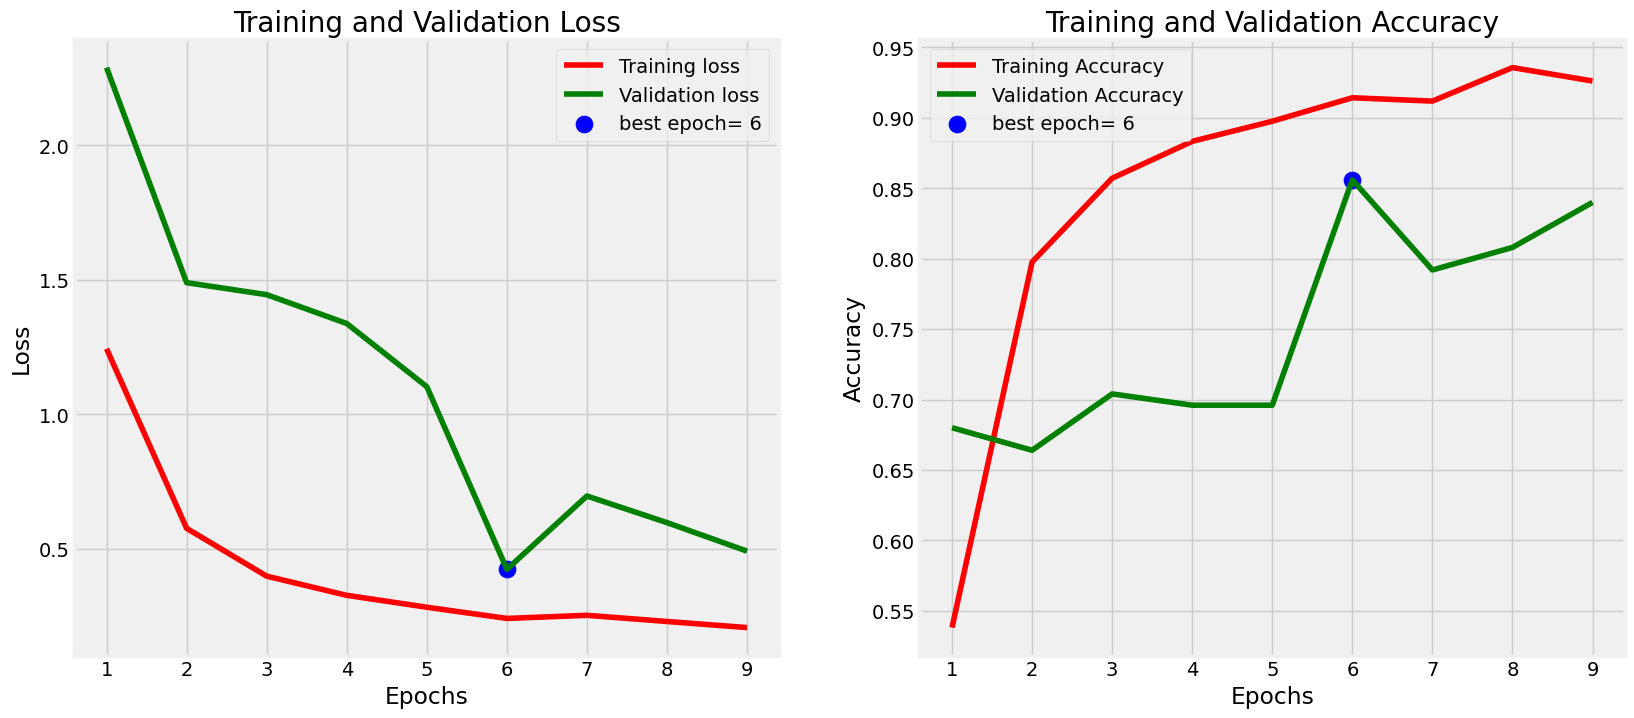

In [14]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show()

# Training : Fine Tuning

In [15]:
pretrained_model.trainable = True
for layer in pretrained_model.layers:
    if isinstance(layer, layers.BatchNormalization): # set BatchNorm layers as not trainable
        layer.trainable = False

# let`s see first 10 layers
for l in pretrained_model.layers[:10]:
    print(l.name, l.trainable)

model.compile(
    optimizer=Adam(0.00001), # fine tuning requires very little learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# model.load_weights('./checkpoints/my_checkpoint')
print(model.summary())
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=15,
    callbacks=[
        EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 3,
                               restore_best_weights = True), # if val loss decreases for 5 epochs in a row, stop training,
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min')
    ]
)
model.save_weights('./checkpoints/my_checkpoint')

input_1 True
rescaling True
normalization True
rescaling_1 True
stem_conv_pad True
stem_conv True
stem_bn False
stem_activation True
block1a_dwconv True
block1a_bn False
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 AugmentationLayer (Sequent  (None, None, None, None   0         
 ial)                        )                                   
                                                                 
 efficientnetb2 (Functional  (None, 1408)              7768569   
 )                                                               
                                                                 
 dense (Dense)               (None, 256)               360704    
                                                                 
 activation (Activation

# Display model performance

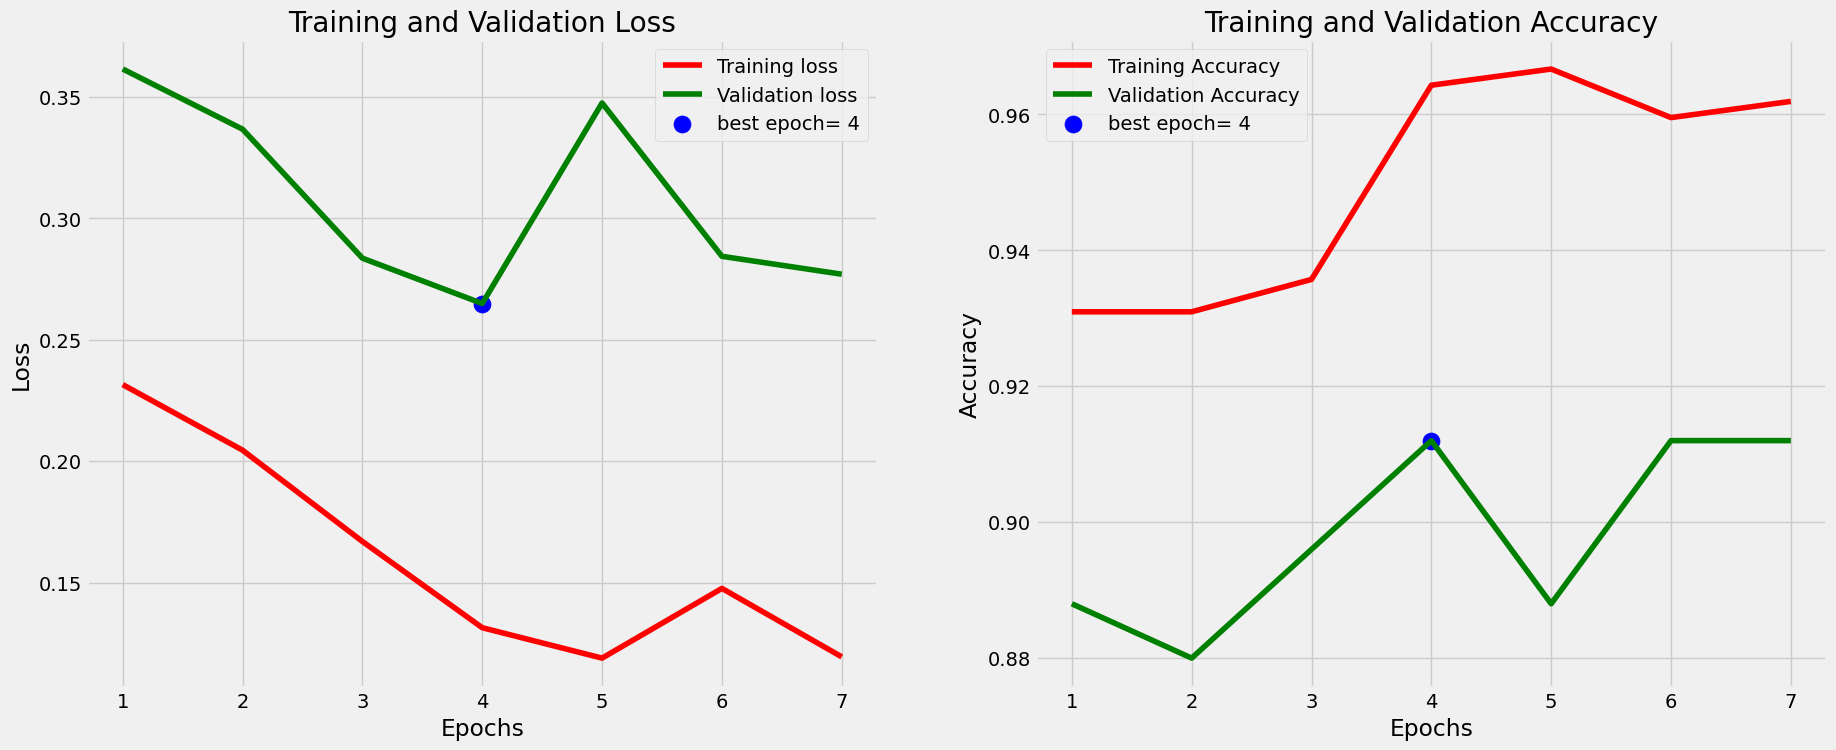

In [16]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# model.evaluate

In [17]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.23170
Test Accuracy: 92.73%


# F1 Score / Recall / Precision

In [18]:
y_true = test_images.classes
y_pred = np.argmax(model.predict(test_images), axis = 1)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score:", f1)
print(classification_report(y_true, y_pred, target_names=test_images.class_indices.keys()))

4/4 [==============================] - 3s 54ms/step
F1 Score: 0.9226941359294302
                  precision    recall  f1-score   support

  Blackspot Leaf       0.91      0.91      0.91        11
     Canker Leaf       0.83      0.71      0.77         7
Citrus Leafminer       1.00      0.89      0.94         9
   Greening Leaf       1.00      1.00      1.00         5
    Healthy Leaf       1.00      1.00      1.00        12
  Powdery Mildew       0.85      1.00      0.92        11

        accuracy                           0.93        55
       macro avg       0.93      0.92      0.92        55
    weighted avg       0.93      0.93      0.93        55



# Get Predictions

In [19]:
classes = dict(zip(test_images.class_indices.values(), test_images.class_indices.keys()))
Predictions = pd.DataFrame({"Image Index" : list(range(len(test_images.labels))),
                            "Test Labels" : test_images.labels,
                            "Test Classes" : [classes[i] for i in test_images.labels],
                            "Prediction Labels" : y_pred,
                            "Prediction Classes" : [classes[i] for i in y_pred],
                            "Path": test_images.filenames,
                            "Prediction Probability" : [x for x in np.asarray(tf.reduce_max(model.predict(test_images), axis = 1))]
                           })
Predictions.head(8)

4/4 [==============================] - 0s 53ms/step


,Image Index,Test Labels,Test Classes,Prediction Labels,Prediction Classes,Path,Prediction Probability
0,0,2,Citrus Leafminer,2,Citrus Leafminer,/content/drive/MyDrive/Skripsi/penyakit_daun_j...,0.992647
1,1,4,Healthy Leaf,4,Healthy Leaf,/content/drive/MyDrive/Skripsi/penyakit_daun_j...,0.995073
2,2,4,Healthy Leaf,4,Healthy Leaf,/content/drive/MyDrive/Skripsi/penyakit_daun_j...,0.982579
3,3,5,Powdery Mildew,5,Powdery Mildew,/content/drive/MyDrive/Skripsi/penyakit_daun_j...,0.739398
4,4,0,Blackspot Leaf,0,Blackspot Leaf,/content/drive/MyDrive/Skripsi/penyakit_daun_j...,0.999999
5,5,1,Canker Leaf,5,Powdery Mildew,/content/drive/MyDrive/Skripsi/penyakit_daun_j...,0.741770
6,6,2,Citrus Leafminer,2,Citrus Leafminer,/content/drive/MyDrive/Skripsi/penyakit_daun_j...,0.985971
7,7,0,Blackspot Leaf,0,Blackspot Leaf,/content/drive/MyDrive/Skripsi/penyakit_daun_j...,0.999926


from matplotlib import pyplot as plt
_df_0['Image Index'].plot(kind='hist', bins=20, title='Image Index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Test Labels'].plot(kind='hist', bins=20, title='Test Labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Prediction Labels'].plot(kind='hist', bins=20, title='Prediction Labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Prediction Probability'].plot(kind='hist', bins=20, title='Prediction Probability')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Test Classes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Prediction Classes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Path').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Image Index', y='Test Labels', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Test Labels', y='Prediction Labels', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Prediction Labels', y='Prediction Probability', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Image Index']
  ys = series['Test Labels']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Image Index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Test Classes')):
  _plot_series(series, series_name, i)
  fig.legend(title='Test Classes', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Image Index')
_ = plt.ylabel('Test Labels')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Image Index']
  ys = series['Test Labels']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Image Index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Prediction Classes')):
  _plot_series(series, series_name, i)
  fig.legend(title='Prediction Classes', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Image Index')
_ = plt.ylabel('Test Labels')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Image Index']
  ys = series['Test Labels']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Image Index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Path')):
  _plot_series(series, series_name, i)
  fig.legend(title='Path', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Image Index')
_ = plt.ylabel('Test Labels')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Image Index']
  ys = series['Prediction Labels']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Image Index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Test Classes')):
  _plot_series(series, series_name, i)
  fig.legend(title='Test Classes', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Image Index')
_ = plt.ylabel('Prediction Labels')

from matplotlib import pyplot as plt
_df_14['Image Index'].plot(kind='line', figsize=(8, 4), title='Image Index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Test Labels'].plot(kind='line', figsize=(8, 4), title='Test Labels')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Prediction Labels'].plot(kind='line', figsize=(8, 4), title='Prediction Labels')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Prediction Probability'].plot(kind='line', figsize=(8, 4), title='Prediction Probability')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Prediction Classes'].value_counts()
    for x_label, grp in _df_18.groupby('Test Classes')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Test Classes')
_ = plt.ylabel('Prediction Classes')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Path'].value_counts()
    for x_label, grp in _df_19.groupby('Prediction Classes')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Prediction Classes')
_ = plt.ylabel('Path')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Test Classes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Image Index', y='Test Classes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Prediction Classes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Image Index', y='Prediction Classes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Path'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Image Index', y='Path', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Test Classes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Test Labels', y='Test Classes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Print the most confident errors

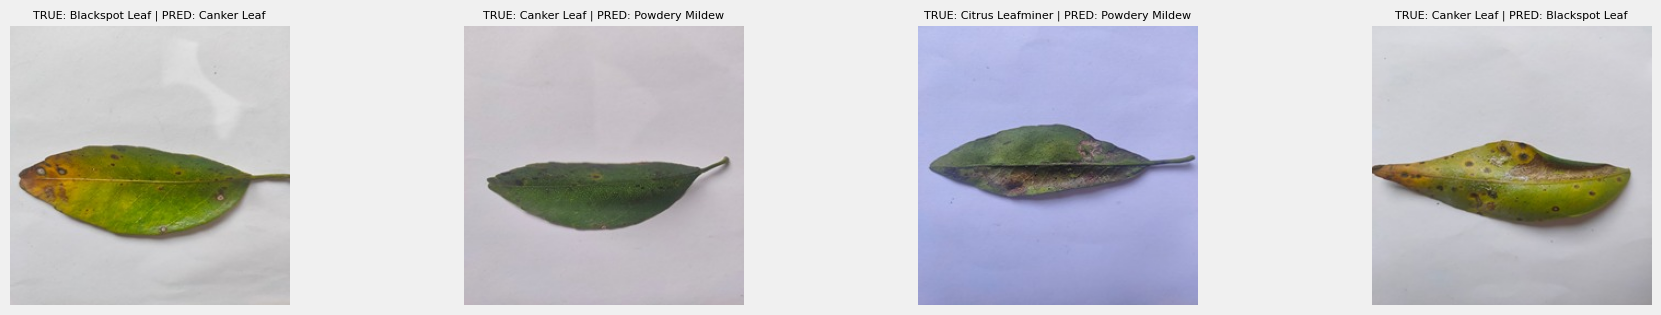

In [20]:
plt.figure(figsize=(20,20))
for i, row in Predictions[Predictions["Test Labels"] != Predictions["Prediction Labels"]].sort_values("Prediction Probability").tail(20).reset_index().iterrows():
    plt.subplot(5,4,i+1)
    image_path = row['Path']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'TRUE: {row["Test Classes"]} | PRED: {row["Prediction Classes"]}', fontsize=8)
    plt.axis('off')

plt.show()

# Confusion Matrics and Classification Report

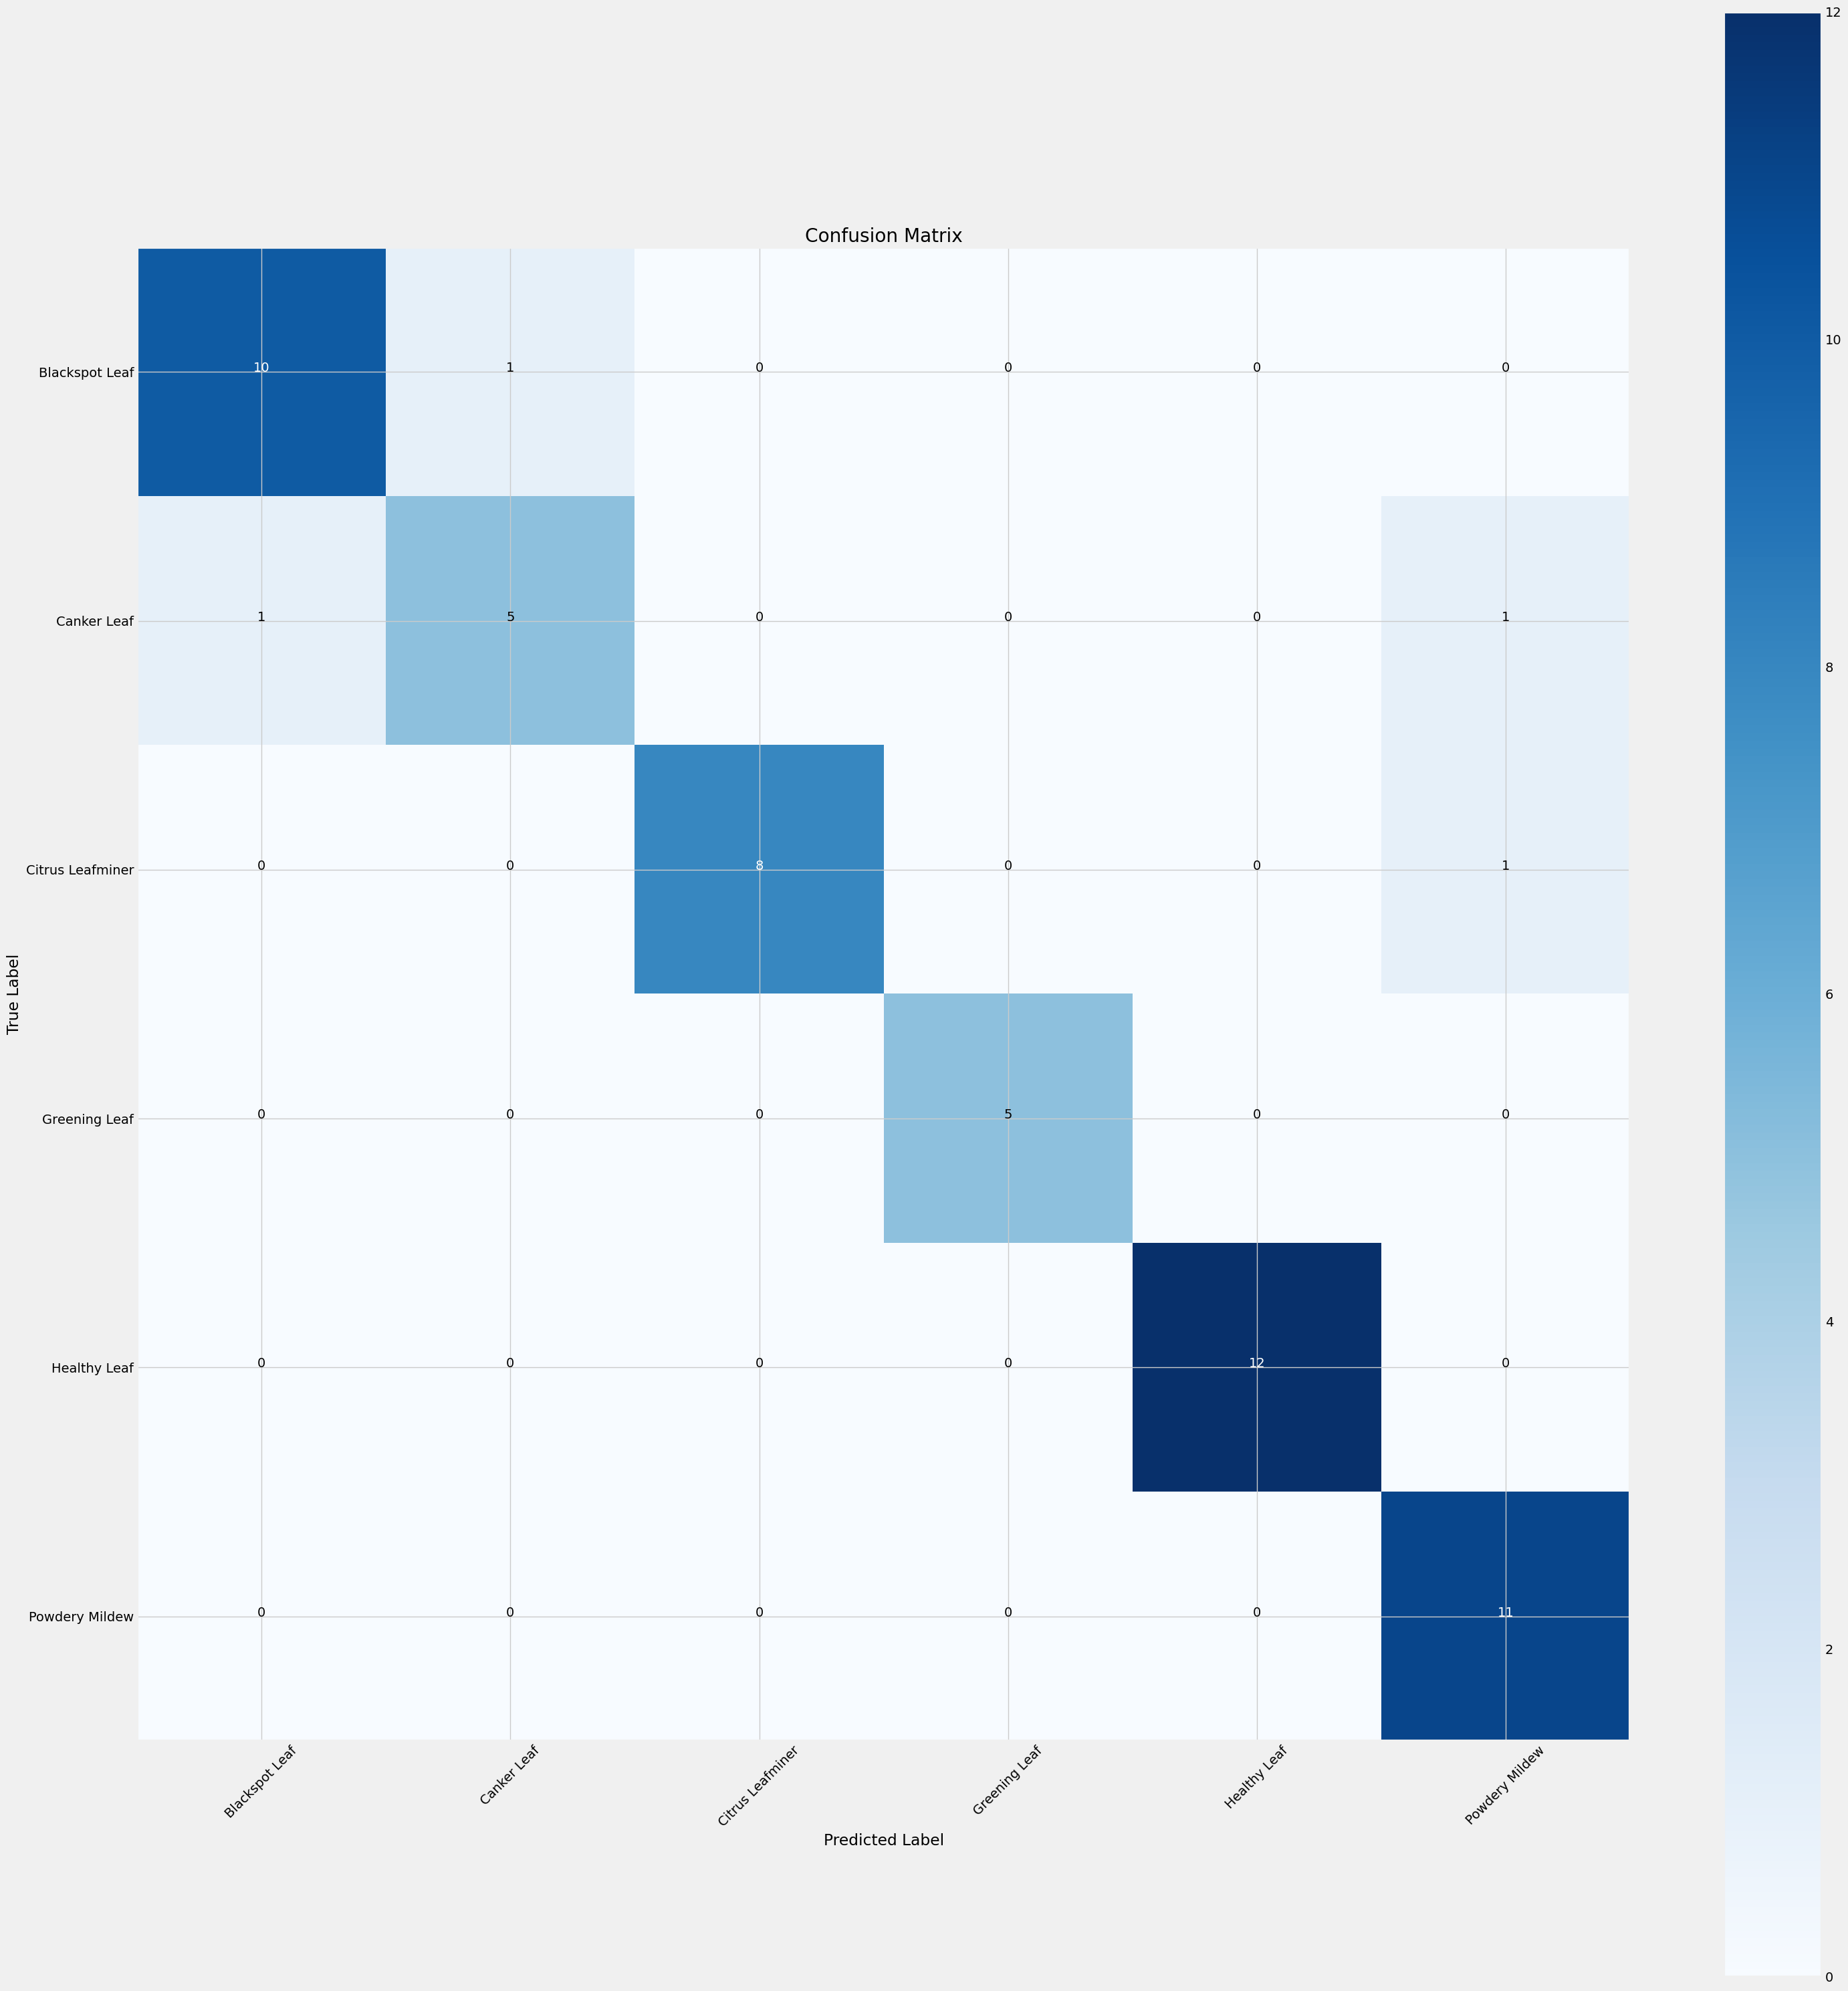

In [21]:
preds = model.predict_generator(test_images)
y_pred = np.argmax(preds, axis=1)
g_dict = test_images.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_images.classes, y_pred)

plt.figure(figsize= (30, 30))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [22]:
# Save the entire model to a HDF5 file
model.save('citrusleafdisease.h5')


In [26]:
model_name = 'EffecientNetB2'
subject = 'CitrusLeafDisease'
# acc = test_image[1] * 100
save_path = '/content/drive/MyDrive/Skripsi'

save_id = str(f'{model_name}-{subject}-.h5')
model_save_loc = os.path.join(save_path, save_id)
model.save(model_save_loc)
print(f'model was saved as {model_save_loc}')

model was saved as /content/drive/MyDrive/Skripsi/EffecientNetB2-CitrusLeafDisease-.h5
